In [21]:
import numpy as np
import tensorflow as tf
import math
import pandas as pd
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
path='/Users/peijialong/Desktop/ANN/auto-mpg.txt'
columnNames = ["MPG","Cylinders","Displacement","Horsepower","Weight","Accleration","Model Year","Origin"]
data =pd.read_csv(path, names=columnNames, na_values="?",comment="\t",sep=" ",skipinitialspace=True)

In [3]:
data = data.dropna()

In [4]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [5]:
train_labels = train_data.pop('MPG')
test_labels = test_data.pop('MPG')

In [6]:
trainStats = train_data.describe()
trainStats = trainStats.transpose()

In [7]:
def Norm(x):
    return (x-trainStats["mean"])/trainStats["std"]
 
TrainData = Norm(train_data)
TestData = Norm(test_data)

In [8]:
train_labels=pd.DataFrame(train_labels)
test_labels =pd.DataFrame(test_labels)

In [20]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [10]:
#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 7
n_output = 1
#Learning parameters
learning_constant = 0.1
number_epochs = 1000

In [11]:
#Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases output layer
b3 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_output]))

In [12]:
def multilayer_perceptron(input_d):
    #Task of neurons of first hidden layer
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
    #Task of neurons of second hidden layer
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
    #Task of neurons of output layer
    out_layer = tf.add(tf.matmul(layer_2, w3),b3)
    return out_layer

In [13]:
#Create model
neural_network = multilayer_perceptron(X)

In [14]:
#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

In [15]:
#Initializing the variables
init = tf.global_variables_initializer()

In [16]:
def plot_MSE(history):
    hist["epoch"] = history.epoch
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [MPG]")
    plt.plot(hist["epoch"],hist["mae"],label="Train Error")
    plt.plot(hist["epoch"],hist["val_mae"],label="Val Error")
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Accuracy: 3.901441


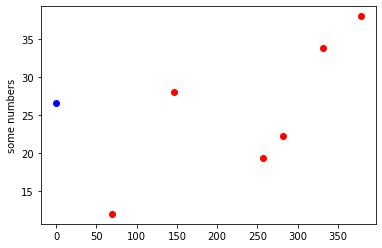

0.0


In [19]:
with tf.Session() as sess:
    sess.run(init)
    #Training epoch
    for epoch in range(number_epochs):
        sess.run(optimizer, feed_dict={X: TrainData, Y:train_labels})
        #Display the epoch
        if epoch % 100 == 0:
            print("Epoch:", '%d' % (epoch))
    # Test model
    pred = (neural_network) # Apply softmax to logit
    accuracy=tf.reduce_mean(tf.keras.losses.MSE(pred,Y))
    #print(accuracy)
    print("Accuracy:", accuracy.eval({X: TrainData, Y:train_labels}))
    #plot_MSE()
    #tf.keras.evaluate(pred,TrainData)
    #print("Prediction:", pred.eval({X: TrainData}))
    output=neural_network.eval({X: TrainData})
    plt.plot(train_labels[0:6], 'ro', output[0], 'bo')
    plt.ylabel('some numbers')
    plt.show()

    estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
    correct_prediction1 = tf.equal(tf.argmax(pred, 1),train_labels)
    accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
    print(accuracy1.eval({X: TrainData}))

In [63]:
output

array([[27.260977 ],
       [24.730852 ],
       [13.542427 ],
       [36.222504 ],
       [36.98557  ],
       [21.563469 ],
       [37.14404  ],
       [30.808525 ],
       [19.212534 ],
       [25.801714 ],
       [27.843647 ],
       [14.678419 ],
       [24.110224 ],
       [13.870735 ],
       [16.522167 ],
       [36.87095  ],
       [23.62602  ],
       [13.891657 ],
       [26.248684 ],
       [26.772165 ],
       [19.04578  ],
       [16.718143 ],
       [22.279314 ],
       [24.9251   ],
       [36.703495 ],
       [13.985312 ],
       [30.524569 ],
       [25.428604 ],
       [20.188442 ],
       [15.430012 ],
       [21.127535 ],
       [35.82708  ],
       [25.418356 ],
       [28.847025 ],
       [19.532408 ],
       [31.14512  ],
       [28.105085 ],
       [14.292849 ],
       [15.942968 ],
       [14.049293 ],
       [14.769777 ],
       [37.164745 ],
       [35.737637 ],
       [14.939713 ],
       [33.558434 ],
       [15.98889  ],
       [33.160374 ],
       [14.30